<a href="https://colab.research.google.com/github/yeahginny/Data-Analysis-School/blob/main/0829_GeoData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,925 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

## 데이터셋

In [ ]:
#필요한 기능 import 하기

import json
from urllib.request import Request, urlopen
from urllib.parse import urlencode

#url 호출하기

url = 'https://api.odcloud.kr/api/15044249/v1/uddi:c2b72a04-63da-4d1c-8613-dfbd799b1a95?page=1&perPage=10000&returnType=JSON&serviceKey=awTxJS1jsushjhlZdNDmmbzFJL0BHw7iqfR3SpvY9HIR12hhHksJe9uxvK5%2B2uRzXuzgqNKIZWwsRLAMoDjUhQ%3D%3D'
request = Request(url)

with urlopen(request) as response:
    data = json.loads(response.read().decode('utf-8'))

print(data)

{'currentCount': 3420, 'data': [{'고유역번호(외부역코드)': 150, '수송연월': '2022-01', '승하차인원수': 2139094, '역명': '서울역(1)', '연번': 1, '호선': 1}, {'고유역번호(외부역코드)': 151, '수송연월': '2022-01', '승하차인원수': 1016011, '역명': '시청(1)', '연번': 2, '호선': 1}, {'고유역번호(외부역코드)': 152, '수송연월': '2022-01', '승하차인원수': 1626882, '역명': '종각', '연번': 3, '호선': 1}, {'고유역번호(외부역코드)': 153, '수송연월': '2022-01', '승하차인원수': 1258090, '역명': '종로3가(1)', '연번': 4, '호선': 1}, {'고유역번호(외부역코드)': 154, '수송연월': '2022-01', '승하차인원수': 1112653, '역명': '종로5가', '연번': 5, '호선': 1}, {'고유역번호(외부역코드)': 155, '수송연월': '2022-01', '승하차인원수': 579385, '역명': '동대문(1)', '연번': 6, '호선': 1}, {'고유역번호(외부역코드)': 156, '수송연월': '2022-01', '승하차인원수': 689637, '역명': '신설동(1)', '연번': 7, '호선': 1}, {'고유역번호(외부역코드)': 157, '수송연월': '2022-01', '승하차인원수': 971569, '역명': '제기동', '연번': 8, '호선': 1}, {'고유역번호(외부역코드)': 158, '수송연월': '2022-01', '승하차인원수': 1083534, '역명': '청량리', '연번': 9, '호선': 1}, {'고유역번호(외부역코드)': 159, '수송연월': '2022-01', '승하차인원수': 502544, '역명': '동묘앞(1)', '연번': 10, '호선': 1}, {'고유역번호(외부역코드)': 201, '수송연월': '20

* 서울교통공사_월별 승하차인원 - https://www.data.go.kr/data/15044249/fileData.do
* 지하철역 주소 정보 - http://data.seoul.go.kr/dataList/OA-12035/S/1/datasetView.do

In [ ]:
import pandas as pd

In [ ]:
# 제공된 데이터를 사용하여 DataFrame 생성
large_df = pd.DataFrame(data['data'])

# '수송연월'에서 월 정보만 추출하여 '월' 컬럼 생성
large_df['월'] = large_df['수송연월'].str[-2:]

# pivot_table을 이용하여 월별 승하차인원수 컬럼으로 정렬
pivot_large_df = large_df.pivot_table(index=['호선', '고유역번호(외부역코드)', '역명'], columns='월', values='승하차인원수', aggfunc='sum').reset_index()
pivot_large_df.fillna(0, inplace=True)  # NaN 값을 0으로 채우기

pivot_large_df.head()  # 상위 5개 행만 표시하여 결과 확인

월,호선,고유역번호(외부역코드),역명,01,02,03,04,05,06,07,08,09,10,11,12
0,1,150,서울역(1),2139094,1777728,1942521,2340003,2767047,2665079,2707151,2661044,2705782,3026053,3001196,3061177
1,1,151,시청(1),1016011,873746,1009395,1159393,1303216,1244681,1298666,1287149,1310877,1535611,1521923,1534579
2,1,152,종각,1626882,1335408,1501363,1720022,1985267,1910100,1992535,1952736,1905943,2060640,2101977,2223211
3,1,153,종로3가(1),1258090,1062723,1186762,1360957,1520565,1445161,1451780,1375925,1429079,1570497,1510343,1549846
4,1,154,종로5가,1112653,948585,1098511,1238006,1350508,1301324,1287096,1235249,1269755,1404142,1354658,1437628


In [ ]:
pivot_large_df

월,호선,고유역번호(외부역코드),역명,01,02,03,04,05,06,07,08,09,10,11,12
0,1,150,서울역(1),2139094,1777728,1942521,2340003,2767047,2665079,2707151,2661044,2705782,3026053,3001196,3061177
1,1,151,시청(1),1016011,873746,1009395,1159393,1303216,1244681,1298666,1287149,1310877,1535611,1521923,1534579
2,1,152,종각,1626882,1335408,1501363,1720022,1985267,1910100,1992535,1952736,1905943,2060640,2101977,2223211
3,1,153,종로3가(1),1258090,1062723,1186762,1360957,1520565,1445161,1451780,1375925,1429079,1570497,1510343,1549846
4,1,154,종로5가,1112653,948585,1098511,1238006,1350508,1301324,1287096,1235249,1269755,1404142,1354658,1437628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,9,4134,송파나루,174312,148888,163620,191267,192815,186219,198546,191008,183618,198461,194499,217354
281,9,4135,한성백제,84230,73148,80137,93373,102740,97660,98375,96057,101996,116097,105479,105457
282,9,4136,올림픽공원(9),197497,160698,182382,227266,279159,260536,240979,263827,306169,323520,278491,315912
283,9,4137,둔촌오륜,32073,29363,37913,41861,43423,41199,41144,38524,39941,42998,43000,44869


In [ ]:
공공데이터 포털 API가져오기 - https://velog.io/@rokomoko/21.07.21MAC-%EC%97%90%EC%84%9C-%EA%B3%B5%EA%B3%B5-API-%EA%B0%80%EC%A0%B8%EC%98%A4%EA%B8%B0

SyntaxError: ignored

## 모듈 import & 파일 로드

In [ ]:
import os
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

DATA = 'data'

## 역명에 대한 클린징

In [ ]:
import re

# Regular Expression 적용하여 ()괄호를 제거 후 추출
pattern_string = r'.+(?=\()'
pattern = re.compile(pattern_string)

In [ ]:
pattern.match('올림픽공원(9)').group().strip()

'올림픽공원'

In [ ]:
def clean_station(x):
    # 코드입력
    location = pattern.match(x)
    if location:
        loc = location.group().strip()
    else:
        loc = x
    return loc

In [ ]:
# 코드입력
pivot_large_df['역명_clean'] = pivot_large_df['역명'].apply(clean_station)
pivot_large_df[['역명_clean', '역명']].head(10)

월,역명_clean,역명
0,서울역,서울역(1)
1,시청,시청(1)
2,종각,종각
3,종로3가,종로3가(1)
4,종로5가,종로5가
5,동대문,동대문(1)
6,신설동,신설동(1)
7,제기동,제기동
8,청량리,청량리
9,동묘앞,동묘앞(1)


`역명` 컬럼을 제거한 뒤, `역명_clean`컬럼을 `역명`으로 변환합니다.

In [ ]:
# 코드입력
pivot_large_df = pivot_large_df.drop('역명', axis=1)
pivot_large_df = pivot_large_df.rename({'역명_clean':'역명'}, axis=1)
pivot_large_df.head()

월,호선,고유역번호(외부역코드),01,02,03,04,05,06,07,08,09,10,11,12,역명
0,1,150,2139094,1777728,1942521,2340003,2767047,2665079,2707151,2661044,2705782,3026053,3001196,3061177,서울역
1,1,151,1016011,873746,1009395,1159393,1303216,1244681,1298666,1287149,1310877,1535611,1521923,1534579,시청
2,1,152,1626882,1335408,1501363,1720022,1985267,1910100,1992535,1952736,1905943,2060640,2101977,2223211,종각
3,1,153,1258090,1062723,1186762,1360957,1520565,1445161,1451780,1375925,1429079,1570497,1510343,1549846,종로3가
4,1,154,1112653,948585,1098511,1238006,1350508,1301324,1287096,1235249,1269755,1404142,1354658,1437628,종로5가


## 중복 되는 역에 대한 승하차 인원 합계 환산

In [ ]:
pivot_large_df.loc[pivot_large_df['역명'] == '서울역']

월,호선,고유역번호(외부역코드),01,02,03,04,05,06,07,08,09,10,11,12,역명
0,1,150,2139094,1777728,1942521,2340003,2767047,2665079,2707151,2661044,2705782,3026053,3001196,3061177,서울역
110,4,426,682330,556660,613056,740762,875094,840180,861320,835275,837404,947366,956236,969970,서울역


In [ ]:
pivot_large_df.loc[pivot_large_df['역명'] == '고속터미널']

월,호선,고유역번호(외부역코드),01,02,03,04,05,06,07,08,09,10,11,12,역명
79,3,329,2336338,1942684,2043697,2448269,2907989,2706498,2838987,2693172,2785293,2967097,2785005,3009673,고속터미널
237,7,2736,773175,669873,703338,819779,943840,901491,911995,874399,887078,941175,941667,947029,고속터미널


In [ ]:
# 코드입력
df_total = pivot_large_df.groupby('역명').sum().reset_index().drop('고유역번호(외부역코드)', axis=1)
df_total

월,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12
0,가락시장,11,878389,711560,814995,907360,972281,930999,932436,908885,924870,976581,1000086,1050675
1,가산디지털단지,7,2112788,1766806,1981272,2145932,2262202,2185006,2244044,2178287,2144639,2195918,2365985,2343699
2,강남,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444
3,강남구청,7,841856,718315,797247,869636,931166,921507,934269,923010,912565,966078,1001209,987290
4,강동,5,925764,797918,902495,983501,1052331,1008769,1025119,999681,987215,1054208,1056305,1071222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,홍제,3,854602,743235,855487,950000,1040631,967054,956727,922404,975886,1038665,1042960,1029395
244,화곡,5,1396317,1204261,1362536,1484663,1600168,1520850,1543225,1502592,1515319,1596269,1610770,1636151
245,화랑대,6,514233,441682,524471,581397,640461,574305,561718,537415,614813,637531,652795,621044
246,회현,4,1207856,973497,1154494,1337780,1500203,1401246,1389373,1289455,1340905,1523320,1523022,1629464


In [ ]:
df_merged = pd.merge(df_total, pivot_large_df.drop_duplicates('역명', keep='first')[['역명', '고유역번호(외부역코드)']], how='left')
df_merged

월,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12,고유역번호(외부역코드)
0,가락시장,11,878389,711560,814995,907360,972281,930999,932436,908885,924870,976581,1000086,1050675,340
1,가산디지털단지,7,2112788,1766806,1981272,2145932,2262202,2185006,2244044,2178287,2144639,2195918,2365985,2343699,2748
2,강남,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444,222
3,강남구청,7,841856,718315,797247,869636,931166,921507,934269,923010,912565,966078,1001209,987290,2732
4,강동,5,925764,797918,902495,983501,1052331,1008769,1025119,999681,987215,1054208,1056305,1071222,2549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,홍제,3,854602,743235,855487,950000,1040631,967054,956727,922404,975886,1038665,1042960,1029395,314
244,화곡,5,1396317,1204261,1362536,1484663,1600168,1520850,1543225,1502592,1515319,1596269,1610770,1636151,2518
245,화랑대,6,514233,441682,524471,581397,640461,574305,561718,537415,614813,637531,652795,621044,2647
246,회현,4,1207856,973497,1154494,1337780,1500203,1401246,1389373,1289455,1340905,1523320,1523022,1629464,425


In [ ]:
pivot_large_df.loc[pivot_large_df['역명'] == '고속터미널']

월,호선,고유역번호(외부역코드),01,02,03,04,05,06,07,08,09,10,11,12,역명
79,3,329,2336338,1942684,2043697,2448269,2907989,2706498,2838987,2693172,2785293,2967097,2785005,3009673,고속터미널
237,7,2736,773175,669873,703338,819779,943840,901491,911995,874399,887078,941175,941667,947029,고속터미널


In [ ]:
df_merged.loc[df_merged['역명'] == '고속터미널']

월,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12,고유역번호(외부역코드)
16,고속터미널,10,3109513,2612557,2747035,3268048,3851829,3607989,3750982,3567571,3672371,3908272,3726672,3956702,329


In [ ]:
# 코드입력
address = pd.read_csv('/content/seoul_station_geocode.csv')

# csv 파일이 없는 경우
address.head()

,호선,역명,lat,lng,주소,역번호
0,1,서울역,37.564119,126.976808,서울특별시 중구 세종대로 지하 2,150
1,1,시청,37.565704,126.976862,서울특별시 중구 세종대로 지하 101,151
2,1,종각,37.570169,126.983099,서울특별시 종로구 종로 지하 55,152
3,1,종로3가,37.570371,126.991005,서울특별시 종로구 종로 지하 129,153
4,1,종로5가,37.559785,126.970986,서울특별시 종로구 종로 지하 216,154


In [ ]:
# 코드입력
merged_data = pd.merge(df_merged, address[['주소', '역명', 'lat', 'lng']], on='역명', how='left')
merged_data.head()

,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12,고유역번호(외부역코드),주소,lat,lng
0,가락시장,11,878389,711560,814995,907360,972281,930999,932436,908885,924870,976581,1000086,1050675,340,서울특별시 송파구 송파대로 지하 257,37.492663,127.118544
1,가산디지털단지,7,2112788,1766806,1981272,2145932,2262202,2185006,2244044,2178287,2144639,2195918,2365985,2343699,2748,서울특별시 금천구 벚꽃로 309,37.482255,126.882183
2,강남,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444,222,서울특별시 강남구 강남대로 지하 396,37.497786,127.027777
3,강남구청,7,841856,718315,797247,869636,931166,921507,934269,923010,912565,966078,1001209,987290,2732,서울특별시 강남구 학동로 지하346,37.517133,127.041299
4,강동,5,925764,797918,902495,983501,1052331,1008769,1025119,999681,987215,1054208,1056305,1071222,2549,서울특별시 강동구 천호대로 지하1097,37.537595,127.125370


In [ ]:
df_merged.shape, merged_data.shape

((248, 15), (248, 18))

`역명`을 기준으로 승하차인원에 대한 합계를 구합니다.

In [ ]:
merged_data.isnull().sum()

역명              0
호선              0
01              0
02              0
03              0
04              0
05              0
06              0
07              0
08              0
09              0
10              0
11              0
12              0
고유역번호(외부역코드)    0
주소              6
lat             6
lng             6
dtype: int64

## 주소 데이터 분할

In [ ]:
# 코드입력
merged_data['주소'].str.split()

0        [서울특별시, 송파구, 송파대로, 지하, 257]
1             [서울특별시, 금천구, 벚꽃로, 309]
2        [서울특별시, 강남구, 강남대로, 지하, 396]
3           [서울특별시, 강남구, 학동로, 지하346]
4         [서울특별시, 강동구, 천호대로, 지하1097]
                   ...              
243    [서울특별시, 서대문구, 통일로, 지하, 440-1]
244         [서울특별시, 강서구, 화곡로, 지하168]
245         [서울특별시, 노원구, 화랑로, 지하510]
246         [서울특별시, 중구, 퇴계로, 지하, 54]
247         [서울특별시, 용산구, 백범로, 지하287]
Name: 주소, Length: 248, dtype: object

**구**만 추출하기

In [ ]:
# 코드입력
merged_data['주소'].str.split().str[1]

0       송파구
1       금천구
2       강남구
3       강남구
4       강동구
       ... 
243    서대문구
244     강서구
245     노원구
246      중구
247     용산구
Name: 주소, Length: 248, dtype: object

In [ ]:
# 코드입력
merged_data['구'] = merged_data['주소'].str.split().str[1]
merged_data['구']

0       송파구
1       금천구
2       강남구
3       강남구
4       강동구
       ... 
243    서대문구
244     강서구
245     노원구
246      중구
247     용산구
Name: 구, Length: 248, dtype: object

In [ ]:
merged_data.head()

,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12,고유역번호(외부역코드),주소,lat,lng,구
0,가락시장,11,878389,711560,814995,907360,972281,930999,932436,908885,924870,976581,1000086,1050675,340,서울특별시 송파구 송파대로 지하 257,37.492663,127.118544,송파구
1,가산디지털단지,7,2112788,1766806,1981272,2145932,2262202,2185006,2244044,2178287,2144639,2195918,2365985,2343699,2748,서울특별시 금천구 벚꽃로 309,37.482255,126.882183,금천구
2,강남,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444,222,서울특별시 강남구 강남대로 지하 396,37.497786,127.027777,강남구
3,강남구청,7,841856,718315,797247,869636,931166,921507,934269,923010,912565,966078,1001209,987290,2732,서울특별시 강남구 학동로 지하346,37.517133,127.041299,강남구
4,강동,5,925764,797918,902495,983501,1052331,1008769,1025119,999681,987215,1054208,1056305,1071222,2549,서울특별시 강동구 천호대로 지하1097,37.537595,127.125370,강동구


## folium을 활용한 지도 시각화

In [ ]:
import folium

# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

m = folium.Map(location=[latitude, longitude],
               zoom_start=17,
               width=750,
               height=500
              )
m

In [ ]:
station_name = '시청'
geo = list(merged_data.loc[merged_data['역명'] == station_name, ['lat', 'lng']].iloc[0])
print(f'위도: {geo[0]}, 경도: {geo[1]}')

# folium 시각화
m = folium.Map(location=geo,
               zoom_start=17,
               width=750,
               height=500
              )

folium.Marker(geo,
              popup=station_name,
              tooltip=f'{station_name} 정보').add_to(m)
m

위도: 37.5657037, 경도: 126.9768616


타일을 `cartodbpositron`으로 변경합니다.

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)
m

## 서울 행정구역 표기 및 시각화에 boundary 적용

In [ ]:
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
N = 1
seoul_geo = json.loads(c)
seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

자치구별 1월의 승하차인원 합계량을 산출합니다.

In [ ]:
# 코드입력
merged_data.groupby('구')['01'].sum()

구
강남구     24083992
강동구      7516830
강북구      3870088
강서구      6492586
고양시       222581
관악구      8237249
광명시      2239310
광진구      9667194
구로구      8974996
금천구      2112788
노원구      8942137
도봉구      3305778
동대문구     4007236
동작구      9864882
마포구     14044385
서대문구     2120689
서초구     11953817
성남시      2183402
성동구      8007182
성북구      5222222
송파구     14923639
양천구      3560611
영등포구     6906049
용산구      4113837
은평구      8128805
의정부시       80496
종로구     13803052
중구      17031986
중랑구      4270388
Name: 01, dtype: int64

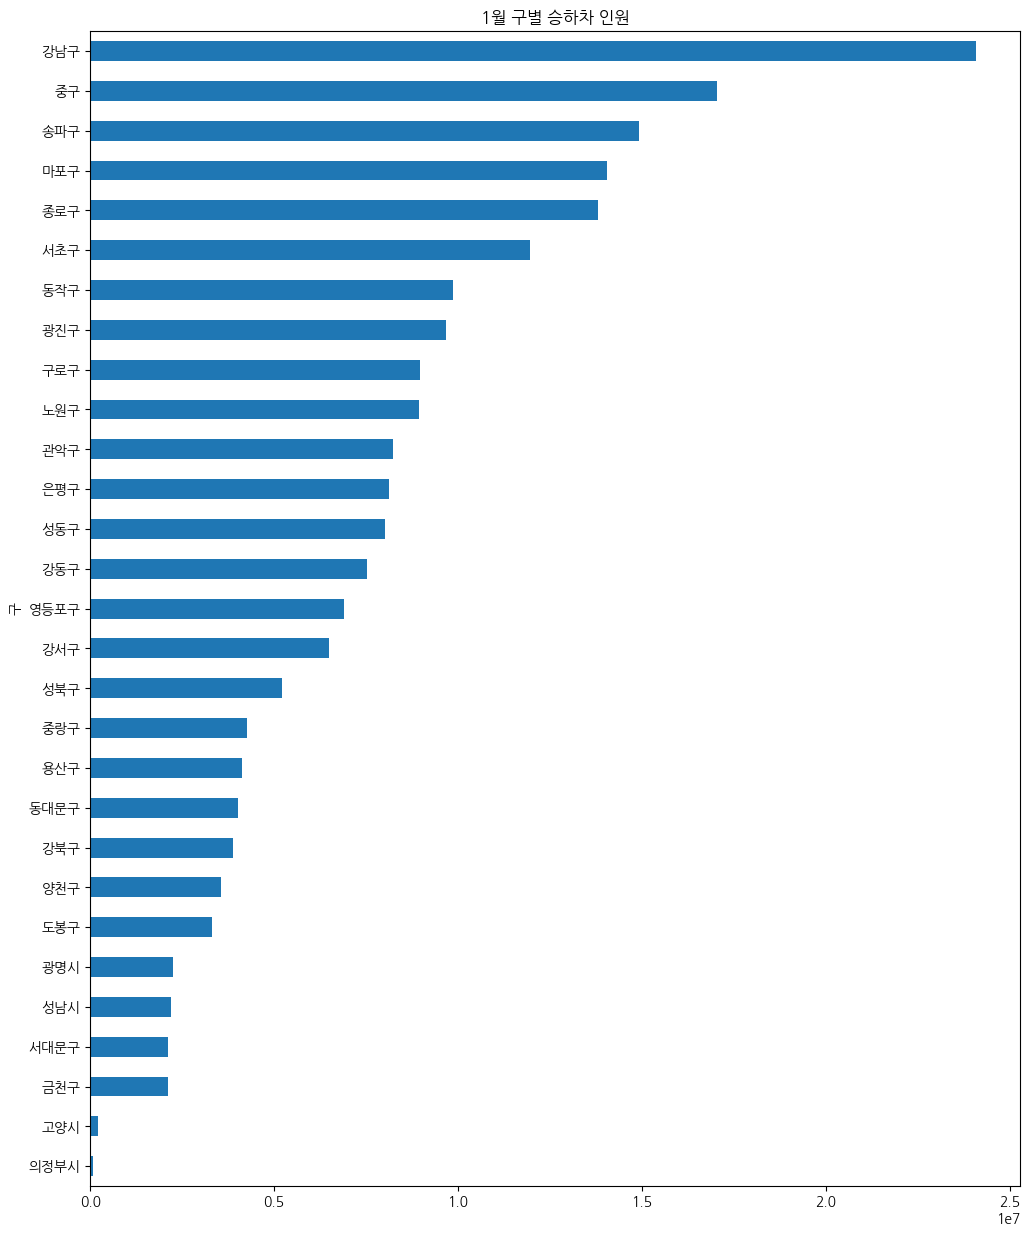

In [ ]:
# 월 설정
plt.figure(figsize=(12, 15))
merged_data.groupby('구')['01'].sum().sort_values().plot(kind='barh')
plt.title(f'{N}월 구별 승하차 인원')
plt.show()

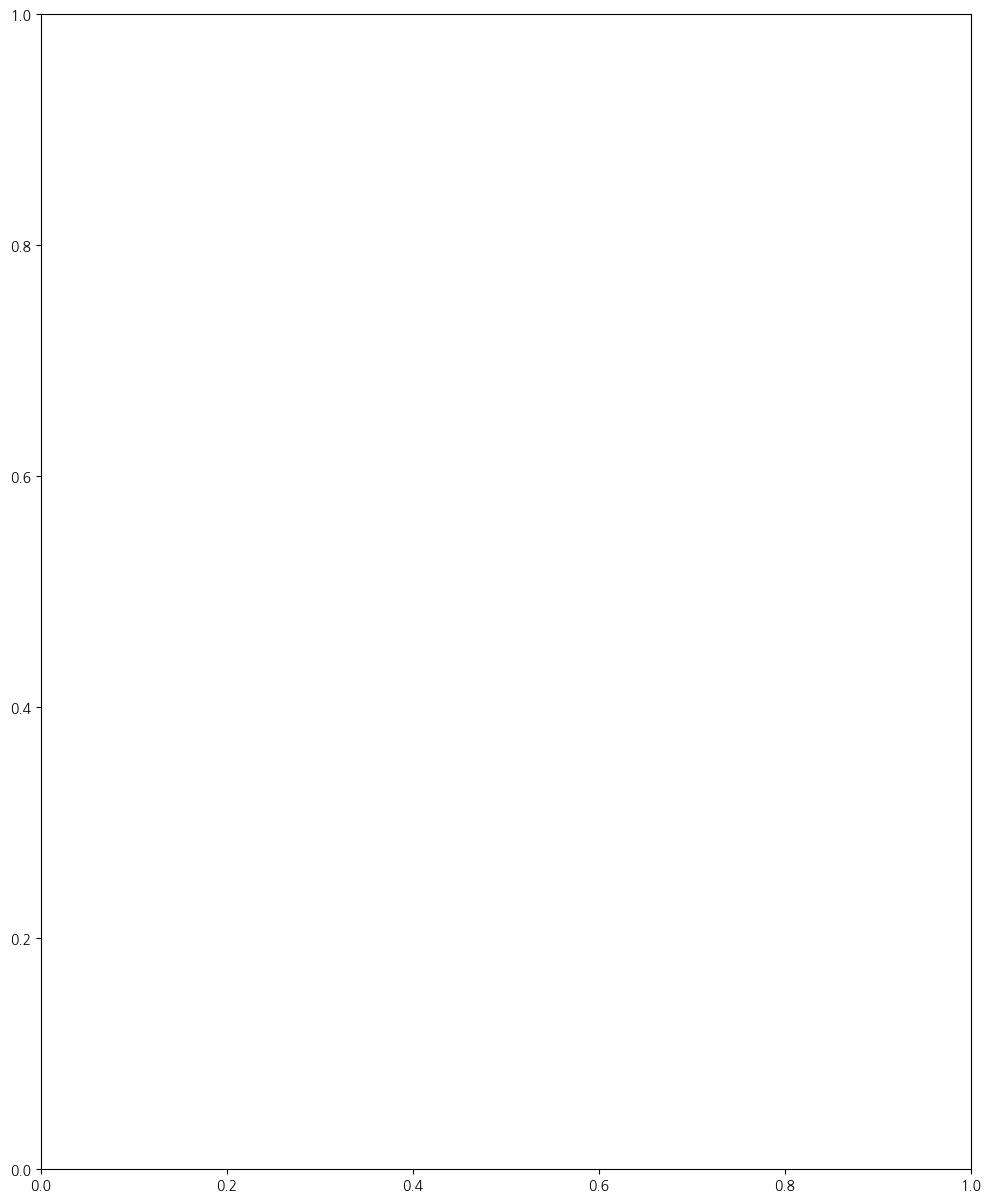

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(12, 15))

def update(num):
    ax.clear()
    merged_data.groupby('구')[f'{num:02}'].sum().sort_values().plot(kind='barh', ax=ax)
    ax.set_title(f'{num}월 구별 승하차 인원')

ani = animation.FuncAnimation(fig, update, frames=range(1, 13), repeat=False)
plt.show()


In [ ]:
ani.save('animation.gif', writer='imagemagick', fps=1)

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=10,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=merged_data.groupby('구')['01'].sum(),
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.9,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name=f'{N}월 승하차 인원',
            )
m

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
import folium
from folium.plugins import TimestampedGeoJson
import branca.colormap as cm

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=10,
    tiles='cartodbpositron'
)

features = []

# 데이터의 최소 및 최대 값을 기준으로 색상 매핑
max_value = merged_data.select_dtypes(include=['float64', 'int64']).max().max()
min_value = merged_data.select_dtypes(include=['float64', 'int64']).min().min()

colormap = cm.linear.YlOrRd_09.scale(min_value, max_value)

# Loop through each month
for N in range(1, 13):
    month_data = merged_data.groupby('구')[f'{N:02}'].sum().reset_index()
    month_data.columns = ['구', 'value']

    for feature in seoul_geo['features']:
        region_name = feature['properties']['name']
        value = int(month_data[month_data['구'] == region_name]['value'].values[0]) if region_name in month_data['구'].values else 0

        color = colormap(value)  # value에 따른 색상을 가져옴

        new_feature = {
            'type': 'Feature',
            'geometry': feature['geometry'],
            'properties': {
                'time': f'2023-{N:02}-01T00:00:00Z',
                'style': {
                    'color': 'grey',
                    'weight': 0.5,
                    'fillColor': color,
                    'fillOpacity': 0.6
                },
                'value': value
            }
        }
        features.append(new_feature)

# Add the TimestampedGeoJson to the map
TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='P1M',
    auto_play=True,
    loop=False,
    max_speed=1,
    time_slider_drag_update=True
).add_to(m)

colormap.caption = "승하차 인원"
colormap.add_to(m)

m


In [ ]:
merged_data

,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12,고유역번호(외부역코드),주소,lat,lng,구
0,가락시장,11,878389,711560,814995,907360,972281,930999,932436,908885,924870,976581,1000086,1050675,340,서울특별시 송파구 송파대로 지하 257,37.492663,127.118544,송파구
1,가산디지털단지,7,2112788,1766806,1981272,2145932,2262202,2185006,2244044,2178287,2144639,2195918,2365985,2343699,2748,서울특별시 금천구 벚꽃로 309,37.482255,126.882183,금천구
2,강남,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444,222,서울특별시 강남구 강남대로 지하 396,37.497786,127.027777,강남구
3,강남구청,7,841856,718315,797247,869636,931166,921507,934269,923010,912565,966078,1001209,987290,2732,서울특별시 강남구 학동로 지하346,37.517133,127.041299,강남구
4,강동,5,925764,797918,902495,983501,1052331,1008769,1025119,999681,987215,1054208,1056305,1071222,2549,서울특별시 강동구 천호대로 지하1097,37.537595,127.125370,강동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,홍제,3,854602,743235,855487,950000,1040631,967054,956727,922404,975886,1038665,1042960,1029395,314,서울특별시 서대문구 통일로 지하 440-1,37.588802,126.944112,서대문구
244,화곡,5,1396317,1204261,1362536,1484663,1600168,1520850,1543225,1502592,1515319,1596269,1610770,1636151,2518,서울특별시 강서구 화곡로 지하168,37.573094,126.818151,강서구
245,화랑대,6,514233,441682,524471,581397,640461,574305,561718,537415,614813,637531,652795,621044,2647,서울특별시 노원구 화랑로 지하510,37.558816,126.927414,노원구
246,회현,4,1207856,973497,1154494,1337780,1500203,1401246,1389373,1289455,1340905,1523320,1523022,1629464,425,서울특별시 중구 퇴계로 지하 54,37.560972,126.994597,중구


## 통계 분석

In [ ]:
stats = merged_data.drop(['주소', '고유역번호(외부역코드)', 'lat', 'lng'], axis=1)
stats

,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12,구
0,가락시장,11,878389,711560,814995,907360,972281,930999,932436,908885,924870,976581,1000086,1050675,송파구
1,가산디지털단지,7,2112788,1766806,1981272,2145932,2262202,2185006,2244044,2178287,2144639,2195918,2365985,2343699,금천구
2,강남,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444,강남구
3,강남구청,7,841856,718315,797247,869636,931166,921507,934269,923010,912565,966078,1001209,987290,강남구
4,강동,5,925764,797918,902495,983501,1052331,1008769,1025119,999681,987215,1054208,1056305,1071222,강동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,홍제,3,854602,743235,855487,950000,1040631,967054,956727,922404,975886,1038665,1042960,1029395,서대문구
244,화곡,5,1396317,1204261,1362536,1484663,1600168,1520850,1543225,1502592,1515319,1596269,1610770,1636151,강서구
245,화랑대,6,514233,441682,524471,581397,640461,574305,561718,537415,614813,637531,652795,621044,노원구
246,회현,4,1207856,973497,1154494,1337780,1500203,1401246,1389373,1289455,1340905,1523320,1523022,1629464,중구


In [ ]:
stats.loc[stats['역명'] == '강남']

,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12,구
2,강남,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444,강남구


In [ ]:
stats.loc[stats['역명'] == '강남'].iloc[:, 1:-1]

,호선,01,02,03,04,05,06,07,08,09,10,11,12
2,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444


In [ ]:
stats

,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12,구
0,가락시장,11,878389,711560,814995,907360,972281,930999,932436,908885,924870,976581,1000086,1050675,송파구
1,가산디지털단지,7,2112788,1766806,1981272,2145932,2262202,2185006,2244044,2178287,2144639,2195918,2365985,2343699,금천구
2,강남,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444,강남구
3,강남구청,7,841856,718315,797247,869636,931166,921507,934269,923010,912565,966078,1001209,987290,강남구
4,강동,5,925764,797918,902495,983501,1052331,1008769,1025119,999681,987215,1054208,1056305,1071222,강동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,홍제,3,854602,743235,855487,950000,1040631,967054,956727,922404,975886,1038665,1042960,1029395,서대문구
244,화곡,5,1396317,1204261,1362536,1484663,1600168,1520850,1543225,1502592,1515319,1596269,1610770,1636151,강서구
245,화랑대,6,514233,441682,524471,581397,640461,574305,561718,537415,614813,637531,652795,621044,노원구
246,회현,4,1207856,973497,1154494,1337780,1500203,1401246,1389373,1289455,1340905,1523320,1523022,1629464,중구


[seaborn pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html)

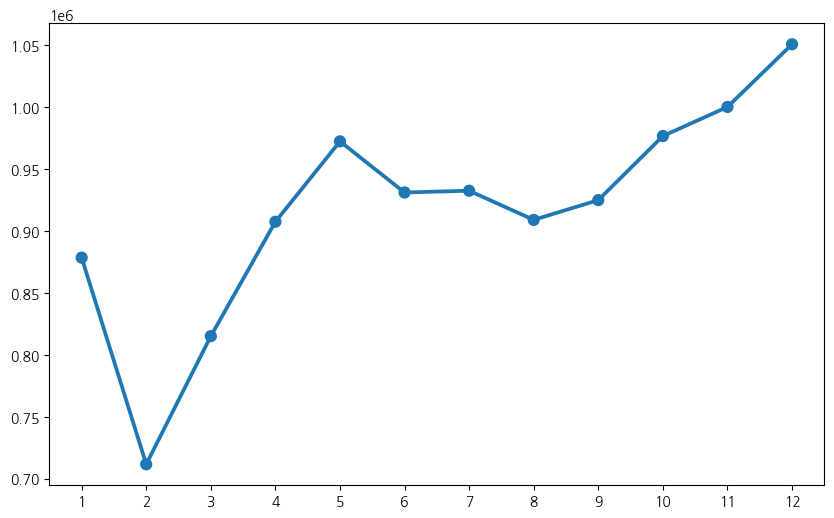

In [ ]:
place = '가락시장'
plt.figure(figsize=(10, 6))
sns.pointplot(x=np.arange(1, 13), y=np.squeeze(stats.loc[stats['역명'] == place].iloc[:, 2:-1].values))
plt.show()

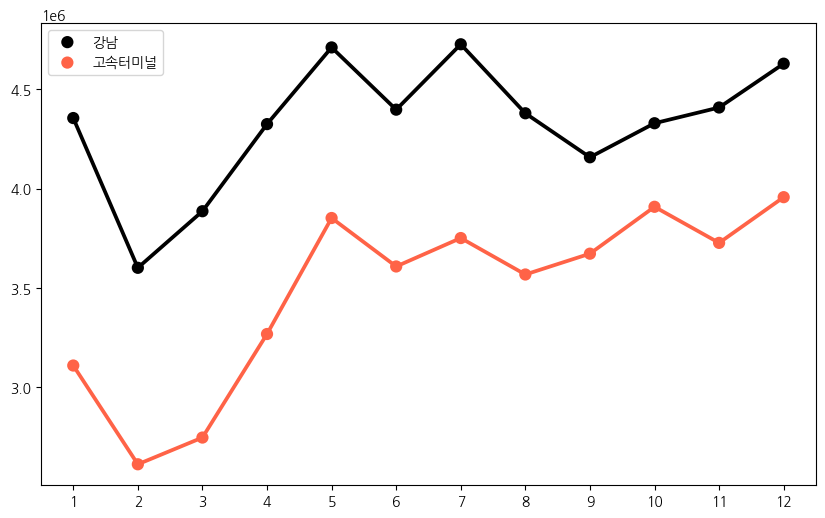

In [ ]:
place1 = '강남'
place2 = '고속터미널'
plt.figure(figsize=(10, 6))
sns.pointplot(x=np.arange(1, 13), y=np.squeeze(stats.loc[stats['역명'] == place1].iloc[:, 2:-1].values), color='black', label=place1)
sns.pointplot(x=np.arange(1, 13), y=np.squeeze(stats.loc[stats['역명'] == place2].iloc[:, 2:-1].values), color='tomato', label=place2)
plt.legend()
plt.show()

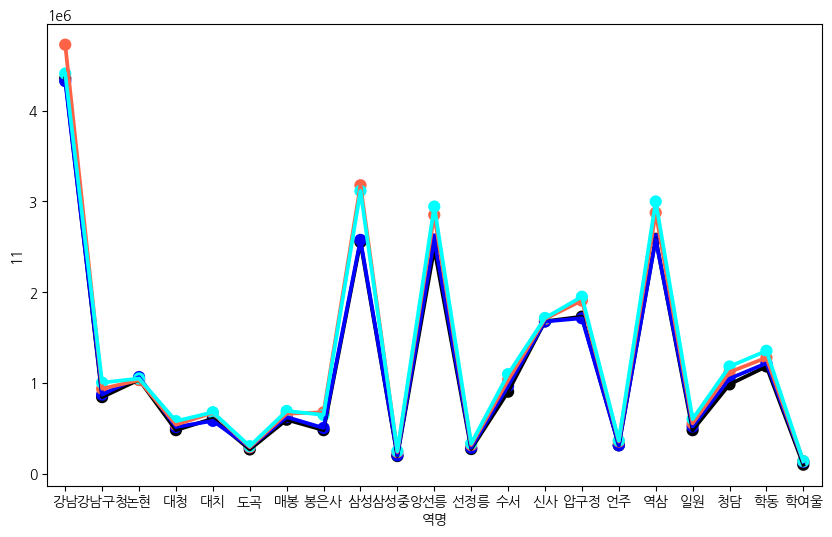

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x ='역명', y='01', data=stats.loc[stats['구'] == '강남구'].iloc[:, :-1], color='black')
sns.pointplot(x ='역명', y='04', data=stats.loc[stats['구'] == '강남구'].iloc[:, :-1], color='blue')
sns.pointplot(x ='역명', y='07', data=stats.loc[stats['구'] == '강남구'].iloc[:, :-1], color='tomato')
sns.pointplot(x ='역명', y='11', data=stats.loc[stats['구'] == '강남구'].iloc[:, :-1], color='cyan')
plt.show()

In [ ]:
stats.loc[stats['구'] == '강남구'].iloc[:, :-1]

,역명,호선,01,02,03,04,05,06,07,08,09,10,11,12
2,강남,2,4354852,3601249,3885981,4324349,4710233,4397082,4726082,4378870,4157422,4328752,4407896,4628444
3,강남구청,7,841856,718315,797247,869636,931166,921507,934269,923010,912565,966078,1001209,987290
46,논현,7,1033733,872897,969816,1063003,1135763,1020863,1029279,997523,978088,1009120,1047206,1038111
52,대청,3,477642,410086,463680,512627,557600,542535,537894,530006,535304,561528,577147,582036
53,대치,3,605192,504925,547058,580535,650592,625959,668909,660392,656145,675336,675362,651403
55,도곡,3,265234,224728,254275,289661,314054,296292,290382,277794,278102,285439,301035,307058
78,매봉,3,593098,495086,545750,622070,674436,651425,660050,632068,631434,647911,689271,696957
101,봉은사,9,477911,415034,445574,502149,583817,599995,673854,609916,576169,617733,646228,715674
109,삼성,2,2550605,2123689,2307890,2574748,2887191,2918807,3176819,2954473,2795884,2947149,3114925,3388065
110,삼성중앙,9,192306,162821,180254,200860,222350,225274,236583,229625,225540,230005,246271,252391


강남구에 위치한 지하철역의 승하차인원을 heatmap으로 시각화합니다.

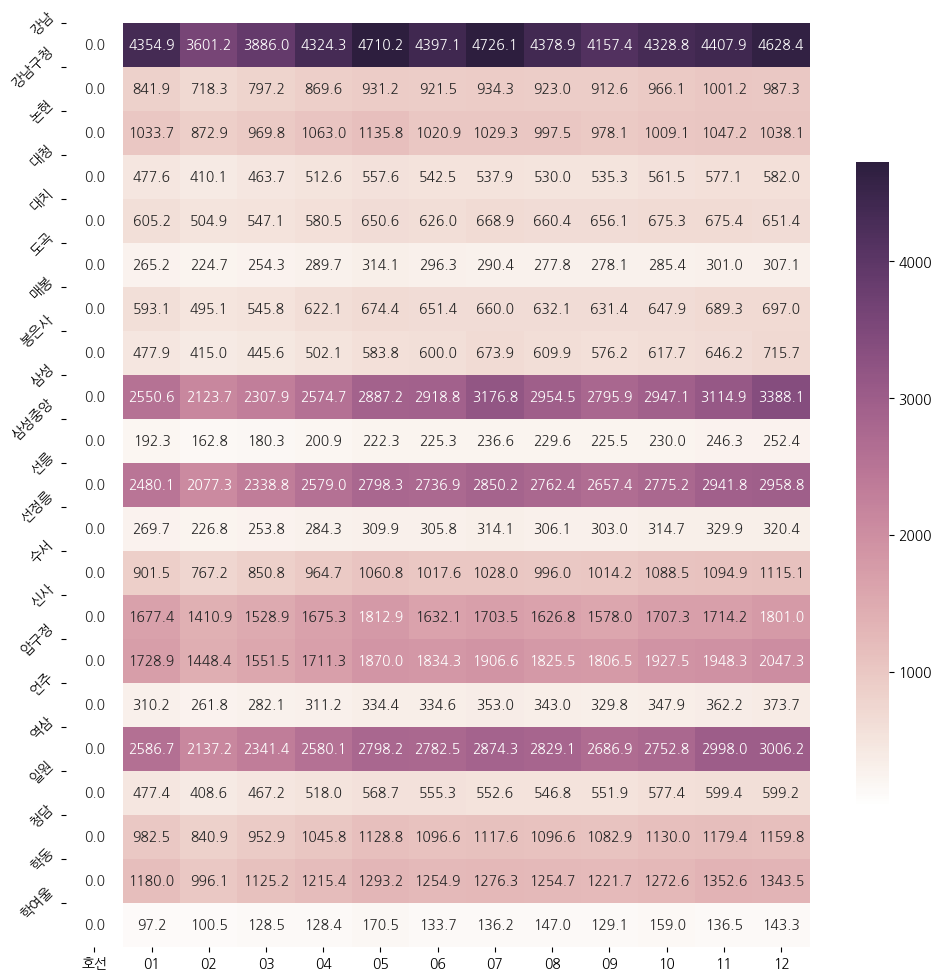

In [ ]:
plt.figure(figsize=(12, 12))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(stats.loc[stats['구'] == '강남구'].iloc[:, 1:-1]/1000, annot=True, fmt='.1f', cmap=cmap, cbar_kws={"shrink": .7})
plt.yticks(np.arange(len(stats.loc[stats['구'] == '강남구'].iloc[:, 0].values)), stats.loc[stats['구'] == '강남구'].iloc[:, 0].values)
plt.yticks(rotation=45)
plt.show()

강남구에 위치한 역의 승하차 인원의 평균을 산출하여 `avg` 임시 변수에 대입합니다.

In [ ]:
avg = stats.loc[stats['구'] == '강남구'].iloc[:, 1:-1].mean()
avg

호선    4.714286e+00
01    1.146857e+06
02    9.621220e+05
03    1.058031e+06
04    1.169203e+06
05    1.276805e+06
06    1.232572e+06
07    1.287937e+06
08    1.234651e+06
09    1.195619e+06
10    1.253423e+06
11    1.303035e+06
12    1.338844e+06
dtype: float64

In [ ]:
avg = stats.loc[stats['구'] == '강남구'].drop(columns='호선').iloc[:, 1:-1].mean()
avg

01    1.146857e+06
02    9.621220e+05
03    1.058031e+06
04    1.169203e+06
05    1.276805e+06
06    1.232572e+06
07    1.287937e+06
08    1.234651e+06
09    1.195619e+06
10    1.253423e+06
11    1.303035e+06
12    1.338844e+06
dtype: float64

In [ ]:
print(len(np.squeeze(stats.loc[stats['역명'] == place1].iloc[:, 2:-1].values)))
print(len(np.squeeze(avg)))

12
13


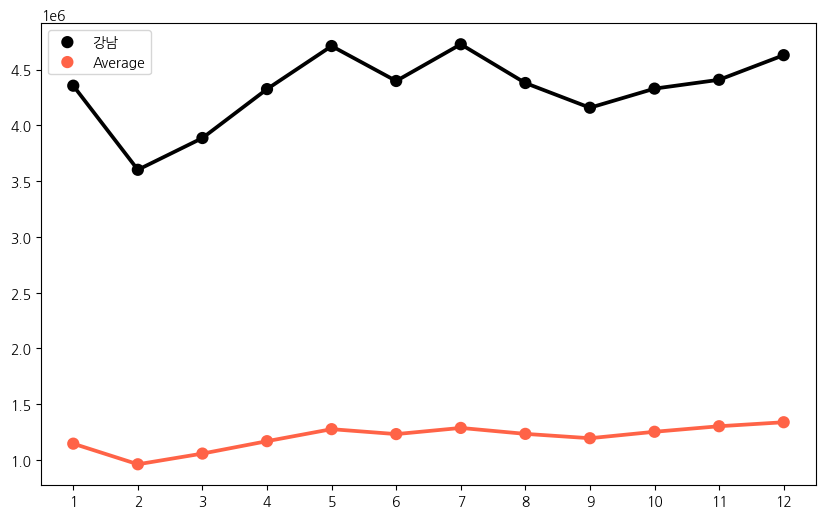

In [ ]:
place1 = '강남'
plt.figure(figsize=(10, 6))
sns.pointplot(x=np.arange(1, 13), y=np.squeeze(stats.loc[stats['역명'] == place1].iloc[:, 2:-1].values), color='black', label=place1)
sns.pointplot(x=np.arange(1, 13), y=np.squeeze(avg), color='tomato', label='Average')
plt.legend()
plt.show()


In [ ]:
gangnam = stats.loc[stats['역명'] == place1].iloc[:, 1:-1].values
gangnam

array([[      2, 4354852, 3601249, 3885981, 4324349, 4710233, 4397082,
        4726082, 4378870, 4157422, 4328752, 4407896, 4628444]])

In [ ]:
gangnam_norm = (gangnam - gangnam.min()) / (gangnam.max() - gangnam.min())
gangnam_norm

array([[0.        , 0.92145076, 0.76199451, 0.82224148, 0.91499657,
        0.99664648, 0.93038628, 1.        , 0.92653277, 0.87967618,
        0.91592821, 0.93267444, 0.9793406 ]])

In [ ]:
avg = avg.values
avg

array([4.71428571e+00, 1.14685676e+06, 9.62121952e+05, 1.05803105e+06,
       1.16920281e+06, 1.27680500e+06, 1.23257224e+06, 1.28793662e+06,
       1.23465143e+06, 1.19561895e+06, 1.25342262e+06, 1.30303519e+06,
       1.33884381e+06])

In [ ]:
avg_norm = (avg - avg.min()) / (avg.max() - avg.min())
avg_norm

array([0.        , 0.85660185, 0.71862051, 0.79025653, 0.87329247,
       0.95366224, 0.92062409, 0.96197662, 0.92217707, 0.8930231 ,
       0.93619757, 0.97325398, 1.        ])

In [ ]:
avg_norm = (avg - avg.min()) / (avg.max() - avg.min())
avg_norm

array([0.        , 0.85660185, 0.71862051, 0.79025653, 0.87329247,
       0.95366224, 0.92062409, 0.96197662, 0.92217707, 0.8930231 ,
       0.93619757, 0.97325398, 1.        ])

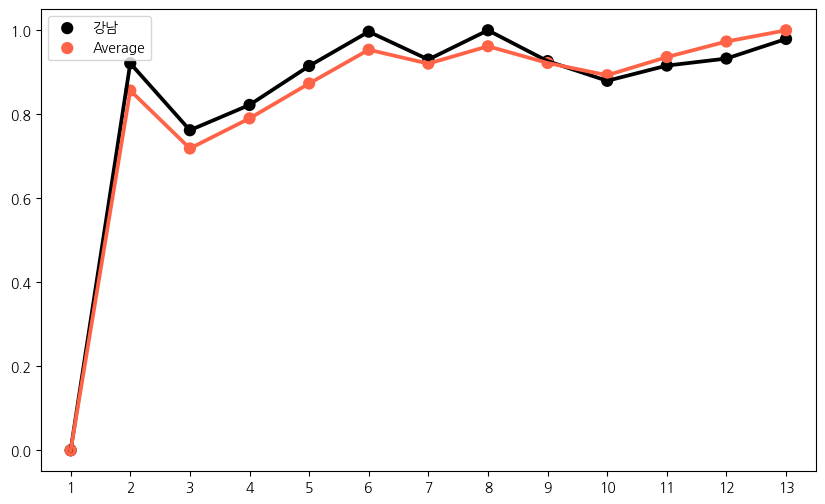

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x=np.arange(1, 14), y=np.squeeze(gangnam_norm), color='black', label='강남')
sns.pointplot(x=np.arange(1, 14), y=np.squeeze(avg_norm), color='tomato', label='Average')
plt.legend()
plt.show()